#Using color detection to inspect one of starbucks distinctive assets </br>
Bradley Besselink 

**Topic:**<br>
Identifying Starbucks distincitve asset (color) from top 50 Google pictures. 

**Interest of the case study:**<br>
How well do 50 images from Google by term 'starbucks' represent color as identifiable assets for brand recognition of Starbucks?

**Motivation:**<br>
Jenny Romaniuk wrote a book* on the role of identifiable assets on the success of brand recall in moments of buying consideration. In this case study I will take a look at Starbucks. When it comes to color Starbucks mostly uses a mix of greens in their branding. The palet can be found at https://creative.starbucks.com/color/. 

The branding decisions make by the creative team of Starbucks are something they have direct control over. The first 50 pictures that pop up when I lookup Starbucks are something they have way less control over (only from their seo/sea efforts). The images that pop-up do represent the image a person gets of the brand when they only google the brand (and do not yet know anything about it). This research case gives an indication how well the stated identifiable assets are represented when not all images made or supported /created by the brand themselves. How visible are the assets? Is Starbucks content living up to the constant use in color as stated in the brand book? Is there any inheritance from profession branding content towards user-generated content when it comes to color use? If the later two questions are answered no, this means that Starbucks could make improvements in the identifiability of their assets. They could try out an improvement and redo the same study to find out if there is indeed an improvement on the representation of identifiable assets. (although, I would suggest that the data of this study should be increased and conclusions should not be based on one persons search results, but that of many potential customers).

*Link to the book: https://www.marketingscience.info/building-distinctive-brand-assets/

#Method
This study is all about the use of color. Therefore I will make use of the analysis of image features. <br>
**Steps:**
1.   create a folder named starbucks_img
2.   scrape the first 50 images from google images based on the search term  'starbucks'
3.   go to https://creative.starbucks.com/color/, take a screenshot of the color palet.
4.   open photoshop, from the screenshot, remove the texts and borders (also copy the hexcodes of all 8 colors to your notepad.
5.   load the images from our local machine by using a path

**Part 1: Explore the Starbucks brand colors & create a dataframe with hexcodes**
6.   plot the color palet
7.   create a color map of the palet
8.   generate the hexcodes of the color palet and store them into a dataframe

**Part 2: Loop through the images & create a dataframe with hex codes**
9.   loop through the images 
10.  add the hexcodes to a list 'hexcodes_list'

Part 3: Compare the hexcodes
11.  check if any of the hex codes are in the dataframe 
12.  count the amount of times a hexcode is in the list 




In [ ]:
#import libaries and load images
import io
import urllib

import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing import image

%config InlineBackend.figure_format='retina' 

image_path='starbucks_img/'
def load_image_from_path(image_path, target_size=None, color_mode='rgb'):
    pil_image = image.load_img(image_path, 
                               target_size=target_size,
                            color_mode=color_mode)
    return image.img_to_array(pil_image)

**Part 1: Explore the Starbucks brand colors & create a dataframe with hexcodes**

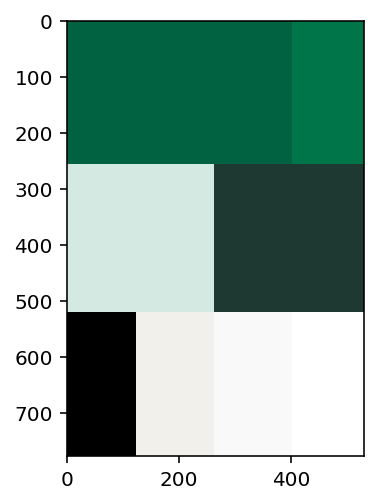

In [ ]:
#plot  the color palet
#i turned the color palette on the side into a color palette only consisting of colours (no borders, no text) using photoshop
import numpy as np
OUR_IMAGE = 'starbucks_img/color_palette_starbucks.jpg' #specify color_palette image

color_image = load_image_from_path(OUR_IMAGE,
                        color_mode='rgb') # use from path if you downloaded it on your local computer
plt.imshow(color_image.astype(np.uint8))

In [ ]:
import colorgram
from matplotlib.colors import to_hex

OUR_IMAGE = 'starbucks_img/color_palette_starbucks.jpg'

color_image = load_image_from_path(OUR_IMAGE,
                        color_mode='rgb')
img = Image.fromarray(color_image.astype(np.uint8)) # convert to PIL image object

colors = colorgram.extract(img, 8) #we try to find the 8 most distinctive colors, as the Starbucks branding color palette consist of 8 colors as well 

(0.0, 1.0, 0.0, 1.0)

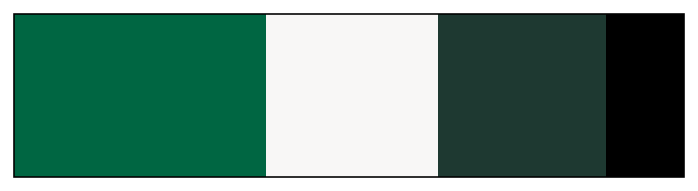

In [ ]:
#lets see if the computer recognizes the colors
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1.5))

norm_colors = [[color / 255 for color in tuple((color.rgb))]  for color in colors] 

cmap = mpl.colors.ListedColormap(norm_colors) # create a colormap
bounds = np.cumsum([color.proportion for color in colors])
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, 
                                  norm=norm,
                                    spacing='proportional',
                                orientation='horizontal')
plt.axis('off')

In [ ]:
#now I'm going to create a dataframe with the hex codes. I'm going to compare the images to the hex codes of the starbucks branding hex codes
import pandas as pd
branding= [] #empty frame
branding_df= pd.DataFrame(branding_df)
for i, color in enumerate(colors):
    rgb = tuple(color.rgb)
    hex_code = to_hex([c/255 for c in rgb])
    branding.append(hex_code)
branding_df['hex_codes'] = branding #hexcodes to dataframe column 'hex_codes'
branding_df.loc[:,'color'] = 'starbucks_color'
branding_df

,hex_codes,color
0,#006642,starbucks_color
1,#f8f7f6,starbucks_color
2,#1e3931,starbucks_color
3,#d3e9e2,starbucks_color
4,#000000,starbucks_color


**Part 2: Loop through the images & create a dataframe with hex codes cursieve tekst**

In [ ]:
import os
img_path = "/Users/bbsln/Documents/Applied data science/Data mining/Untitled Folder/starbucks_img"
hexcodes_list= []
img_df = ""
for image_star in os.listdir(img_path):
    if image_star.startswith("img"): #color palet is in the folder as well, we want to exclude that one
        OUR_IMAGE = 'starbucks_img/{}'.format(image_star)#specify path for each image in the folder
        color_image = load_image_from_path(OUR_IMAGE,color_mode='rgb')
        img = Image.fromarray(color_image.astype(np.uint8)) # convert to PIL image object
        colors = colorgram.extract(img, 8) #we try to find the 8 most distinctive colors, as the starbucks branding color palette consist of 8 colors as well
    
    for i, color in enumerate(colors):
        rgb = tuple(color.rgb)
        hex_code = to_hex([c/255 for c in rgb])
        hexcodes_list.append(hex_code)   
    continue


**Part 3: Compare the hexcodes**

In [ ]:
for code in branding_df['hex_codes']:
    if i in hexcodes_list: #check if hexcode from starbucks branding (i) is in the list of hexcodes from the images (hexcodes_list)
        print(i)

There are no overlapping codes. Perhaps these colors are only used in logos, which take up less space in the image. I will try a higher amount of colors.

In [ ]:
#try the 20 most distinctive colors
import os
img_path = "/Users/bbsln/Documents/Applied data science/Data mining/Untitled Folder/starbucks_img"
hexcodes_list_20= []
img_df = ""
for image_star in os.listdir(img_path):
    if image_star.startswith("img"):
        OUR_IMAGE = 'starbucks_img/{}'.format(image_star)
        color_image = load_image_from_path(OUR_IMAGE,color_mode='rgb')
        img = Image.fromarray(color_image.astype(np.uint8)) # convert to PIL image object
        colors = colorgram.extract(img, 20) #lets try 20
    for i, color in enumerate(colors):
        rgb = tuple(color.rgb)
        hex_code = to_hex([c/255 for c in rgb])
        hexcodes_list_20.append(hex_code)   
    continue

In [ ]:
for code in branding_df['hex_codes']:
    if code in hexcodes_list_20:
        print(code)

There are still no overlapping colors. The earlier we saw that the color hexcodes are an estimation. I happen to have the true hexcodes from photoshop.

In [ ]:
#create a dataframe with the true hexcodes extracted from photoshop
true_hex= pd.DataFrame({'hex_codes':['#016241','#007549','#d4e9e2','#1e3932','#000000','#f1f0eb','#f9f9f9','#ffffff']})

In [ ]:
for code in true_hex['hex_codes']:
    if code in hexcodes_list_20:
        print(code)

There are still no overlapping results

**Conclusion/Discussion:**<br>

None of the hexcodes are overlapping. I did expect to see some overlap with the true hexcodes, since '#000000' and '#ffffff' are included and represent black and white, which are quite common to use. 
This could mean that Starbucks didn't give a lot of space in their content to their earlier stated distinctive colors. Although this doesn't necessarily mean Starbucks doesn't make good use of their distinctive assets, perhaps they are pretty consistent in their use of logo/fonts/sounds.
But if their goal would be to increase brand recognition and recall, through the potential of distinctive assets, then color would be an interesting one to look into based on this small study. An interesting future study could be to take the first 50 images of other coffee brands and do the same comparison. Then, compare the hexcode lists which eachother. If there is a lot of overlap, this means that coffee brands make content that is very much alike based on color. 


Since there is no found overlap, this could mean that the study is too specific. If I had categorized the hex codes into color tunes, this could have led to more overlap. For example, if we look into the dataset we see the logo in quite a lot of pictures, but shading/filters change the tone of color a bit. The green color is in the picture but in a different shade. Does this mean that Starbucks is no longer specified to addressed to the green logo? I don't think this will be the case. I think that people are better at noticing the fact there is some shading in a picture if they are familiar with the shade of green it is supposed to be. 
